<a href="https://colab.research.google.com/github/shreepunitha26/EDA-on-retail-dataset/blob/main/TASK_1_EDA_on_Retail_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries & loading dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Retail Sales Analysis_utf.csv')  # Change to your uploaded file name

# Display first few rows
df.head()


,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


**Understanding the dataset(structure + nulls)**

In [ ]:
## Shape and column names
print("Shape of the dataset:", df.shape)
print("\nColumn Names:", df.columns)

# Data types and null values
df.info()
print("\nMissing values:\n", df.isnull().sum())

# Summary of numeric columns
df.describe()

Shape of the dataset: (2000, 11)

Column Names: Index(['transactions_id', 'sale_date', 'sale_time', 'customer_id', 'gender',
       'age', 'category', 'quantiy', 'price_per_unit', 'cogs', 'total_sale'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB

Missi

,transactions_id,customer_id,age,quantiy,price_per_unit,cogs,total_sale
count,2000.000000,2000.000000,1990.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1000.500000,66.341500,41.343216,2.512769,180.117677,95.023886,456.544817
std,577.494589,44.937185,13.668167,1.132708,189.685225,121.898695,560.101381
min,1.000000,1.000000,18.000000,1.000000,25.000000,6.250000,25.000000
25%,500.750000,24.000000,29.000000,1.000000,30.000000,13.000000,60.000000
50%,1000.500000,69.000000,42.000000,3.000000,50.000000,27.500000,150.000000
75%,1500.250000,102.000000,53.000000,4.000000,300.000000,147.000000,900.000000
max,2000.000000,155.000000,64.000000,4.000000,500.000000,620.000000,2000.000000


**Data Cleaning**

In [ ]:
# Remove missing rows (simple way)
df = df.dropna()

# Confirm it's clean
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  1987 non-null   int64  
 1   sale_date        1987 non-null   object 
 2   sale_time        1987 non-null   object 
 3   customer_id      1987 non-null   int64  
 4   gender           1987 non-null   object 
 5   age              1987 non-null   float64
 6   category         1987 non-null   object 
 7   quantiy          1987 non-null   float64
 8   price_per_unit   1987 non-null   float64
 9   cogs             1987 non-null   float64
 10  total_sale       1987 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 186.3+ KB


**Calculating Key KPIs**

1.**Total** **Sales**

In [ ]:
total_sales = df['total_sale'].sum()
print("📊 Total Sales:", round(total_sales, 2))

📊 Total Sales: 908230.0


**2.Average order value**

In [ ]:
avg_order_value = df['total_sale'].mean()
print("✅ Average Order Value: ₹", round(avg_order_value, 2))

✅ Average Order Value: ₹ 457.09


**3.Revenue by category**

In [ ]:
revenue_by_category = df.groupby('category')['total_sale'].sum().sort_values(ascending=False)
print("✅ Revenue by Category:\n", revenue_by_category)

✅ Revenue by Category:
 category
Electronics    311445.0
Clothing       309995.0
Beauty         286790.0
Name: total_sale, dtype: float64


**Data Visualization**

revenue by category

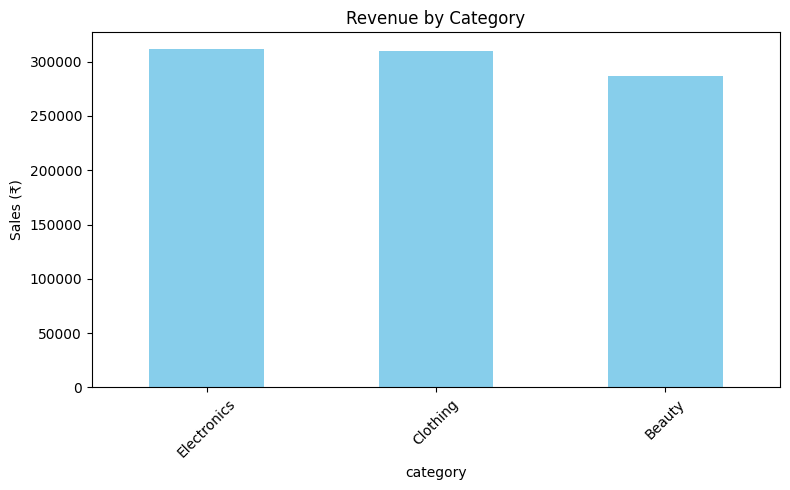

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
revenue_by_category.plot(kind='bar', color='skyblue')
plt.title('Revenue by Category')
plt.ylabel('Sales (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

monthly sales trend

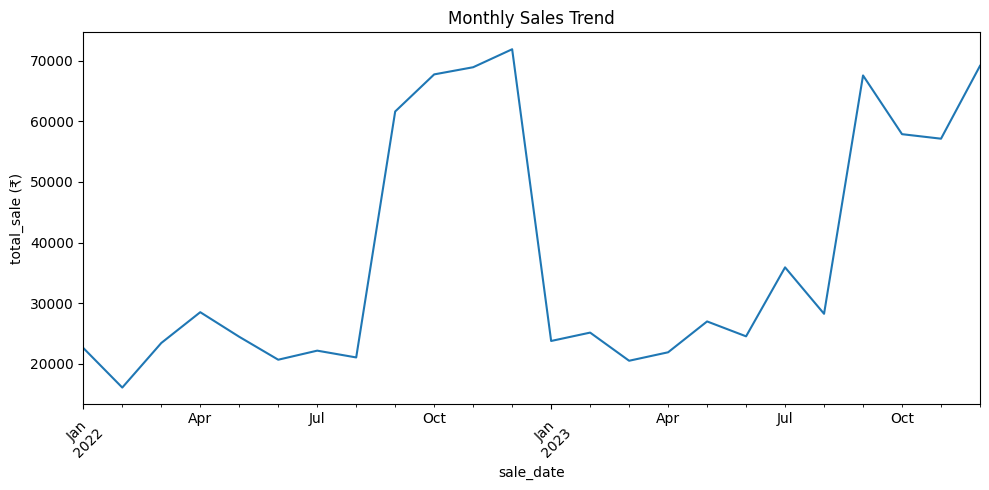

In [ ]:
# Convert date column to datetime
df['sale_date'] = pd.to_datetime(df['sale_date'])

# Group sales by month
monthly_sales = df.groupby(df['sale_date'].dt.to_period('M'))['total_sale'].sum()

# Plot the trend
monthly_sales.plot(kind='line', figsize=(10,5), title='Monthly Sales Trend')
plt.ylabel('total_sale (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()